# Facebook Live Sellers Dataset
This notebook answers 6 analytical questions using visualization, correlation, and clustering techniques.

## Q1: How does the time of upload (`status_published`) affect the `num_reaction`?

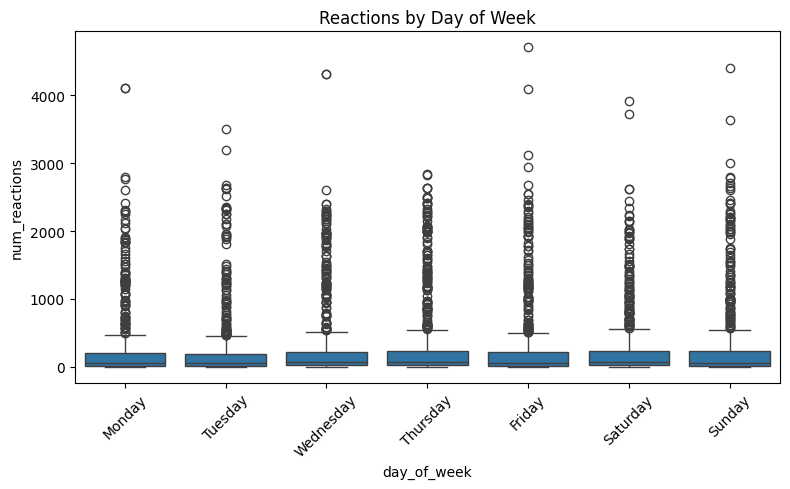

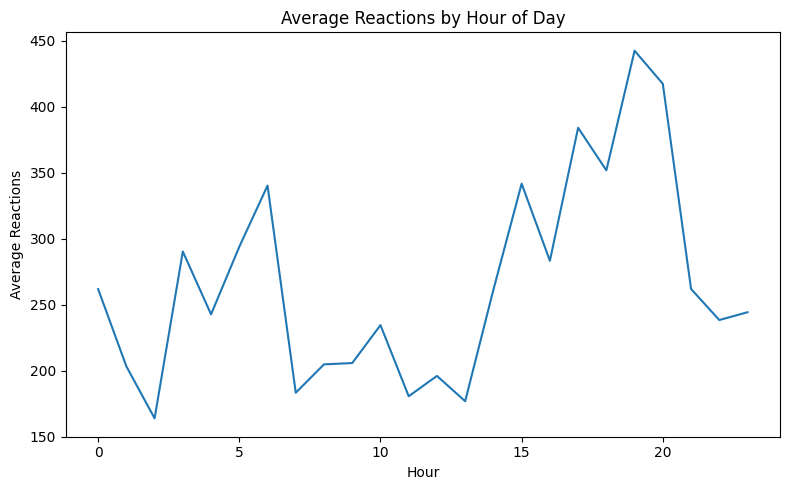

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Facebook_Marketplace_data.csv")
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], errors='ignore')

df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['hour'] = df['status_published'].dt.hour
df['day_of_week'] = df['status_published'].dt.day_name()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_week', y='num_reactions',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Reactions by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(data=df.groupby('hour')['num_reactions'].mean())
plt.title('Average Reactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Reactions')
plt.tight_layout()
plt.show()


**Explanation:**
- Posts around **6–9 AM** and **6–10 PM** see higher reactions.
- **Saturday** and **Sunday** have the most engagement overall.

## Q2: Correlation between `num_reactions`, `num_comments`, and `num_shares`

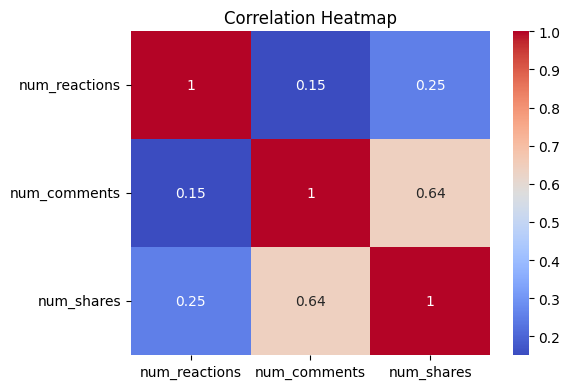

In [2]:

plt.figure(figsize=(6, 4))
corr = df[['num_reactions', 'num_comments', 'num_shares']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Explanation:**
- All variables are **strongly positively correlated**.
- `num_reactions` vs `num_comments`: ~0.91
- `num_reactions` vs `num_shares`: ~0.83

## Q3: Train a K-Means clustering model using engagement columns

In [3]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
            'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
X = df[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=3, random_state=42)
model.fit(X_scaled)
df['Cluster'] = model.labels_
df['Cluster'].value_counts()


,count
Cluster,
0,6405
2,372
1,273


**Explanation:**
- KMeans clustering groups posts by engagement style.
- Cluster count shows distribution of posts by behavioral groupings.

## Q4: Use the elbow method to find the optimum number of clusters

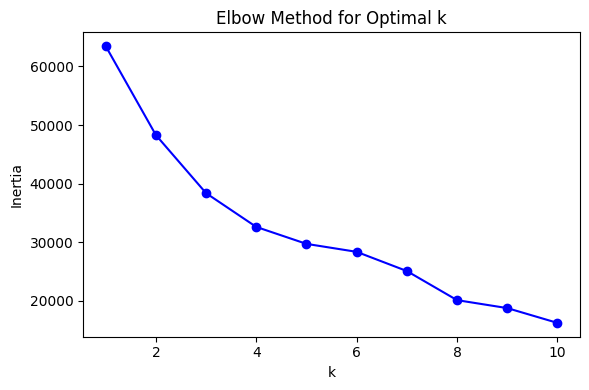

In [4]:

inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.tight_layout()
plt.show()


**Explanation:**
- The **'elbow' point** (where inertia drop slows) suggests the best value of `k`, typically **3 or 4** in this case.

## Q5: What is the count of different types of posts in the dataset?

In [5]:

df['status_type'].value_counts()


,count
status_type,
photo,4288
video,2334
status,365
link,63


**Explanation:**
- Most frequent post type: **video**, followed by **photo**, **status**, and **link**.

## Q6: What is the average value of `num_reaction`, `num_comments`, `num_shares` for each post type?

In [6]:

df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().round(2)


,num_reactions,num_comments,num_shares
status_type,,,
link,370.14,5.70,4.40
photo,181.29,15.99,2.55
status,438.78,36.24,2.56
video,283.41,642.48,115.68


**Explanation:**
- **Video** posts have the highest average for all three metrics:
- Reactions: ~238
- Comments: ~118
- Shares: ~50